### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading dataset 

In [2]:
data = pd.read_csv('train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Variable | Definition | Key
 --- | --- | ---
survival | Survival |	0 = No, 1 = Yes
pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
sex	| Sex |
Age	| Age in years |
sibsp |	# of siblings / spouses aboard the Titanic |
parch |	# of parents / children aboard the Titanic |
ticket | Ticket number |	
fare | Passenger fare |	
cabin |	Cabin number |
embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

**Let's first establish which columns could be potential predictors as to whether the passenger survived or not**
My reasoning:
- Pclass: High class passengers could be given priority in times of emergency
- Sex: Preferential treatment/ different skill sets
- Age: Older passengers less chance/ increased knowledge of dealing with adverse situations
- SibSp: Unsure
- Parch: Unsure 
- Ticket: Maybe people are evacuated based on ordering
- Fare: The higher fare you paid, you might be given priority
- Cabin: Evacuation start from differen cabin numbers
- Embarked: People from different areas could react differently to adverse conditions?

**Variables that are likely not important**
- PassengerID
- Name

### Starting with exploring the dataset and seeing the missing values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


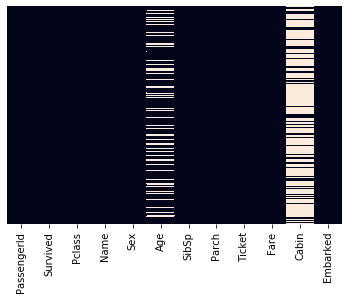

In [4]:
sns.heatmap(data.isnull(), yticklabels = False, cbar=False)

Looks like there are a lot of missing data for **age** and **cabin**
- Age:
    * Since age is numerical, we can explore averaging or splitting to different groups
- Cabin:
    * Too much information is missing, likely not a helpful predictor, possibly dropping the variable

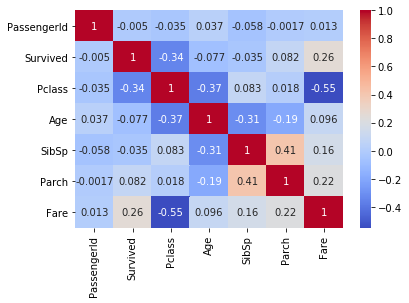

In [5]:
sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True)

C:\Users\resor\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


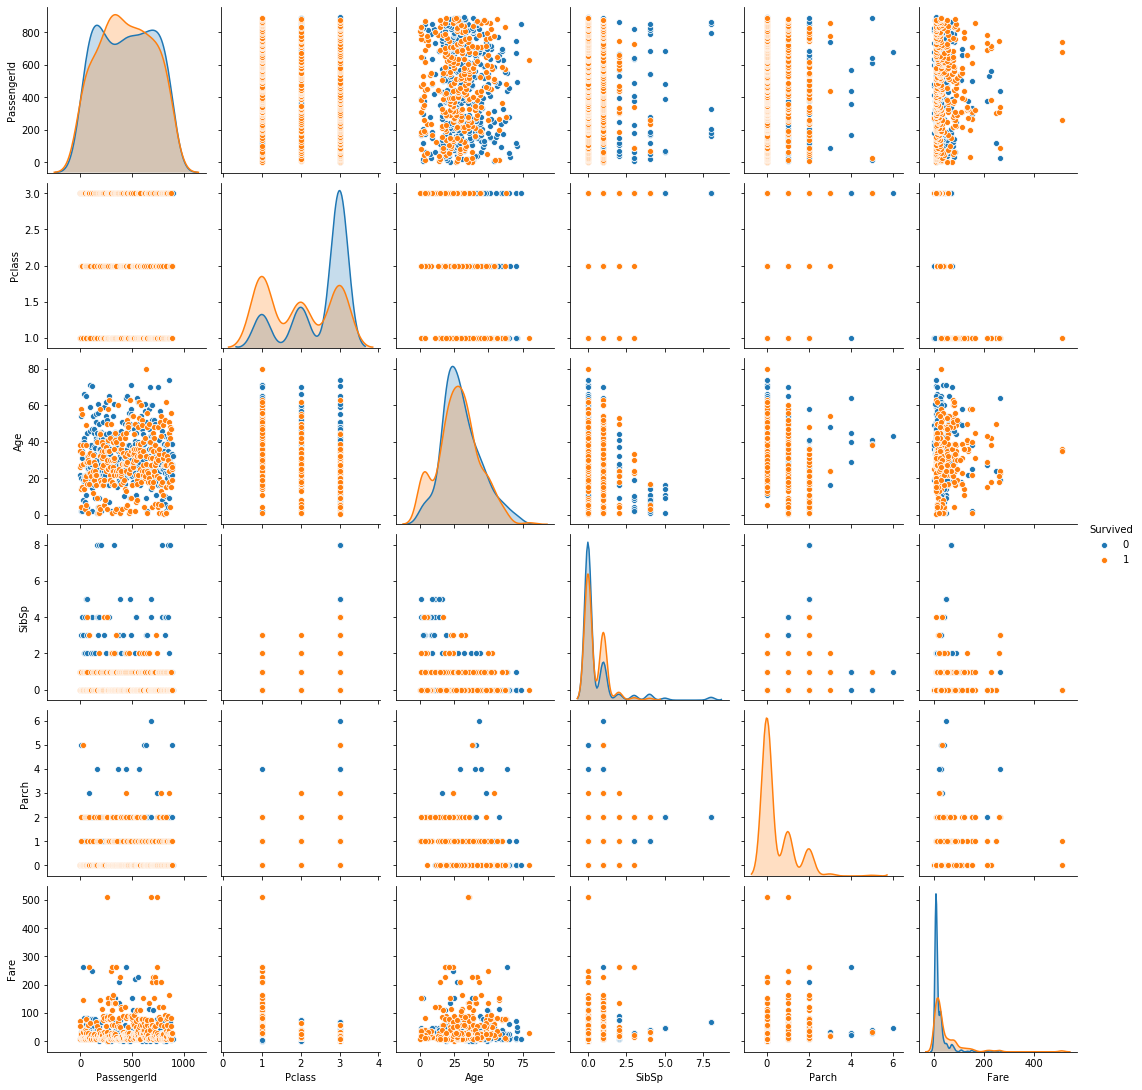

In [6]:
sns.pairplot(data, hue = 'Survived')

**Some trends can be seen**
- Higher fare = more survived
- Lower P class = more survived

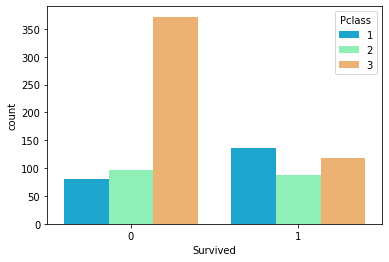

In [7]:
# Looking at the relationship of Pclass with survived
sns.countplot(x = 'Survived',hue = 'Pclass',data = data, palette = 'rainbow')

From the graph, it seems like a disproportionate number of people in the 1st Pclass survived as compared to other class.

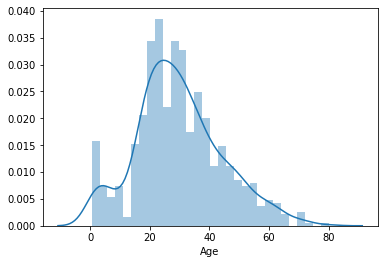

In [8]:
sns.distplot(data['Age'], bins = 30)

In [9]:
data['Ticket'].unique

<bound method Series.unique of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object>

Visually, the ticket information would be very hard to interpret and could possibly be dropped. Otherwise, other methods of analyzing it would involve:
- Separating tickets with codes like STON/02. from tickets with pure numbers
- Looking at the last 2/3 digits of the tickets 

### Data wrangling for processing

Since there is missing information in the age column, let's try to fill in those values.  
Based on the correlation plot, **Pclass** is the most related **Age** as compared to the other variables
- We could try to impute the missing ages with the mean from each Pclass

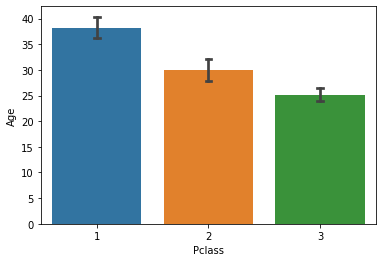

In [10]:
sns.barplot(x = 'Pclass', y = 'Age', capsize = 0.05, data = data)

In [11]:
data.groupby(['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [12]:
def missing_age(cols):   
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

data['Age'] = data[['Age','Pclass']].apply(missing_age,axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Now we convert the categorical data into dummy variables so that it can be easily analyzed**
- Sex
- Embarked

In [14]:
sex_dum = pd.get_dummies(data['Sex'], drop_first = True)
emb_dum = pd.get_dummies(data['Embarked'], drop_first = True)

In [15]:
# Merging the data back into the main dataset
# Dropping the repeated/unwanted variables
data = pd.concat([data, sex_dum, emb_dum], axis = 1)
data.drop(['Cabin', 'Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [16]:
data.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Training and Validation

In [17]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.20, 
                                                    random_state = 24)

In [19]:
model = LogisticRegression(max_iter=99999)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=99999,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
pred = model.predict(X_test)

**Let's look at some evaluation matrix/report**


In [21]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[102  15]
 [ 14  48]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       117
           1       0.76      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



### Finally, testing with the provided test dataset

In [22]:
test_data = pd.read_csv('test.csv')

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


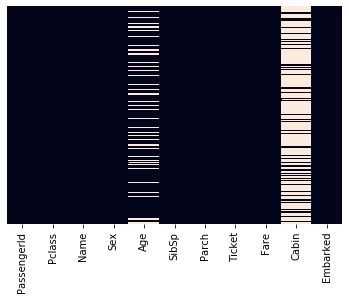

In [24]:
sns.heatmap(test_data.isnull(), yticklabels = False, cbar=False)

In [25]:
test_data['Age'] = test_data[['Age','Pclass']].apply(missing_age,axis=1)
test_sex_dum = pd.get_dummies(test_data['Sex'], drop_first = True)
test_emb_dum = pd.get_dummies(test_data['Embarked'], drop_first = True)

test_data = pd.concat([test_data, test_sex_dum, test_emb_dum], axis = 1)
test_data.drop(['Cabin', 'Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [31]:
np.where(np.isnan(test_data))

(array([152], dtype=int64), array([5], dtype=int64))

In [35]:
test_data.iloc[152]

PassengerId    1044.0
Pclass            3.0
Age              60.5
SibSp             0.0
Parch             0.0
Fare              NaN
male              1.0
Q                 0.0
S                 1.0
Name: 152, dtype: float64

In [40]:
test_data['Fare'] = test_data['Fare'].fillna(
    test_data.groupby(['Pclass']).get_group((3))['Fare'].mean()
)

In [45]:
y_submission = model.predict(test_data)

In [48]:
submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_submission})
submission.to_csv('my_submission.csv', index=False)
print('Your submission was successfully saved')

Your submission was successfully saved
